### K-means 클러스터링 실습

sklearn.datasets.samples_generator에 보면 make_blobs()하는 함수가 지원됨.

이 함수를 이용하여 원하는 대로 클러스터를 생성할 수 있음.

In [1]:
# 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs

[]

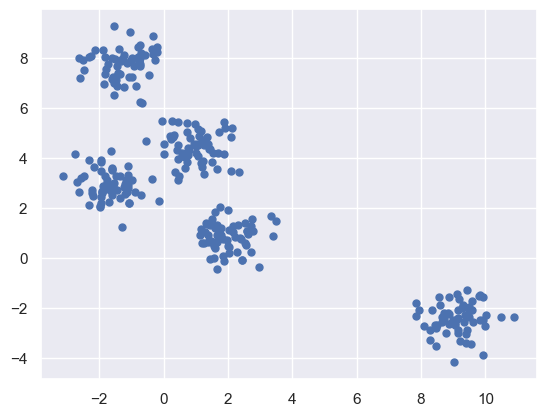

In [2]:
# 데이터 생성
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

plt.scatter(X[:,0], X[:,1], s=25)
plt.plot()

In [3]:
# K-means 알고리즘 학습
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

c:\Users\jsh00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jsh00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


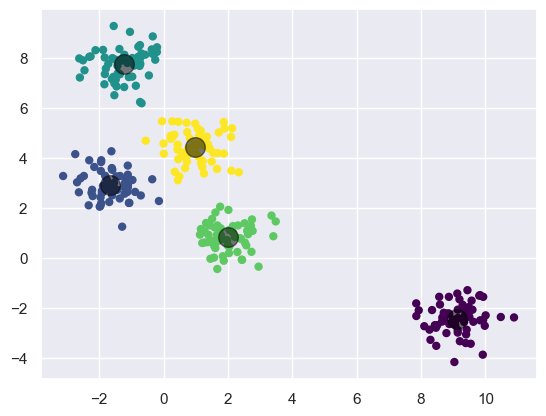

In [4]:
# 클러스터에 따라 색을 다르게 표시
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=25, cmap='viridis')

# 클러스터 위치 표시
center = kmeans.cluster_centers_
plt.scatter(center[:,0], center[:,1], c="black", s=200, alpha=0.5)

plt.show()

* `elbow method` 로 정확한 클러스터 수 찾기

c:\Users\jsh00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jsh00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jsh00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jsh00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

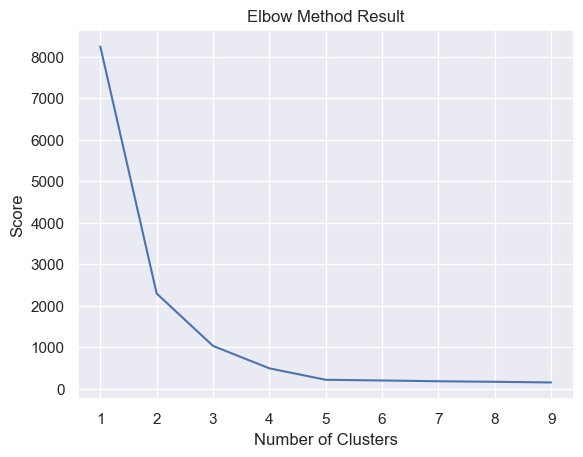

In [5]:
n_cluster = range(1, 10)
elbow_kmeans = [KMeans(n_clusters=i) for i in n_cluster]

score = [km.fit(X).inertia_ for km in elbow_kmeans]

plt.plot(n_cluster, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method Result')
plt.show()